In [26]:
%matplotlib notebook
import orbipy as op
import numpy as np
import pandas as pd
import pickle
import glob
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [139]:
fnames = glob.glob('./calculated_orbits/orbit_*')

In [140]:
len(fnames)

1884

In [141]:
columns = ['x0','z0', 'Ax+', 'Ax-', 'Ay+', 'Ay-', 'Az+', 'Az-', 'vy0']
df = pd.DataFrame(columns=columns, index=np.arange(0,len(fnames)))

In [142]:
i=0
for name in fnames:
    orb = pickle.load(open(name, 'rb'))
    x0, z0, vy0 = orb.loc[0,['x','z','vy']]
    axmin, aymin, azmin = orb.loc[:,['x','y','z']].min()
    axmax, aymax, azmax = orb.loc[:,['x','y','z']].max()
    df.loc[i] = [x0, z0, axmax, axmin, aymax, aymin, azmax, azmin, vy0]
    i+=1 

In [143]:
df.head()

,x0,z0,Ax+,Ax-,Ay+,Ay-,Az+,Az-,vy0
0,1.00121,0.00718002,1.01078,1.00079,0.0119997,-0.0118106,0.00718002,-0.0134361,0.0225579
1,1.00322,0.0135548,1.00873,1.00322,0.00346196,-0.00346215,0.0138514,-0.0138514,0.00592056
2,1.00154,0.0125483,1.01387,0.998579,0.0177977,-0.0176801,0.0125568,-0.0151134,0.0116082
3,1.00302,0.0130851,1.01031,1.00267,0.00748949,-0.007495,0.0140067,-0.0139957,0.00723345
4,1.00423,0.0118101,1.00961,1.00419,0.00469452,-0.00469056,0.0124921,-0.0124981,0.00605706


In [144]:
model = op.crtbp3_model()

In [145]:
def interactive_map(data, prop_name='Az-', diff=False):
    def onclick(event):
        if event.button == 3:
            ix, iy = event.xdata, event.ydata
            buffer.append([ix, iy])
            ax.plot(ix, iy, 'or')   
    fig = plt.figure(figsize=(8.4,7))
    ax = fig.add_subplot(111)
    color = data[prop_name]
    sc2 = ax.scatter(data['x0'], data['z0'], c=color, s=2.5, cmap='jet')
    plt.colorbar(sc2)
    ax.axvline(model.L2, color='k')
    ax.axvline(1-model.mu, color='k')
    ax.axis('equal')
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [146]:
df.shape

(1884, 9)

In [147]:
df2 = df.copy()

In [148]:
df2.drop(df2[df2['Ax-']<0.998].index,inplace=True)

In [149]:
df2.shape

(1754, 9)

<IPython.core.display.Javascript object>


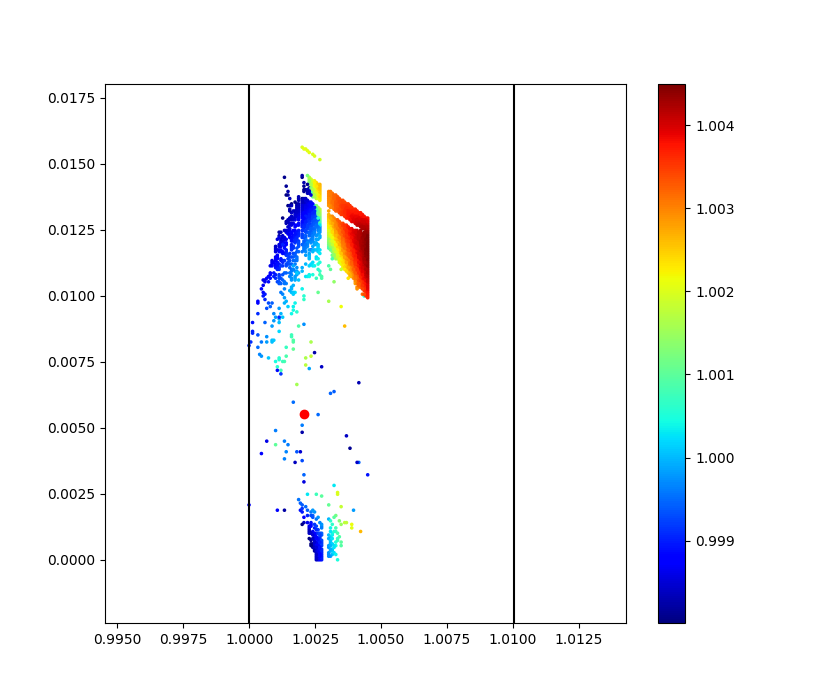

In [168]:
buffer = []
interactive_map(df2, prop_name='Ax-')

In [169]:
buffer

[[1.002076875266303, 0.005516573576271984]]

In [17]:
model = op.crtbp3_model()
precise_model = op.crtbp3_model()
precise_model.integrator.set_params(max_step=np.pi/180)
stm_model = op.crtbp3_model(stm=True)
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='m/s')
scaler = plotter.scaler

In [153]:
!ls

amp_new.pkl		map_calc.py		     SEL2_halo.npy
calculated_orbits	Nullx3AndBisect.ipynb	     x3_l2.bin
calculated_orbits_test	OrbCharacteristicCalc.ipynb  x_new_real.pkl


In [154]:
jobs = pickle.load(open('./calculated_orbits/map_1m_jobs.pkl','rb'))

In [155]:
jobs

,x,z,hash
0,-0.010035,0.000000,0x97539cb9d91271b4
1,-0.010035,0.000067,0xb42a5aad7637b993
2,-0.010035,0.000134,0xef8b92d2d90d917c
3,-0.010035,0.000201,0x65428306dc3640dc
4,-0.010035,0.000268,0xea160951d4bbdd08
5,-0.010035,0.000336,0x35f81fad1c8cac1f
6,-0.010035,0.000403,0x59b9b09a0bb2404a
7,-0.010035,0.000470,0x6a9cd348288da10a
8,-0.010035,0.000537,0x861a7dc2f162b2aa
9,-0.010035,0.000604,0xa02b1b0d2ace20ec


In [24]:
orb = pickle.load(open(fnames[199],'rb'))

<IPython.core.display.Javascript object>


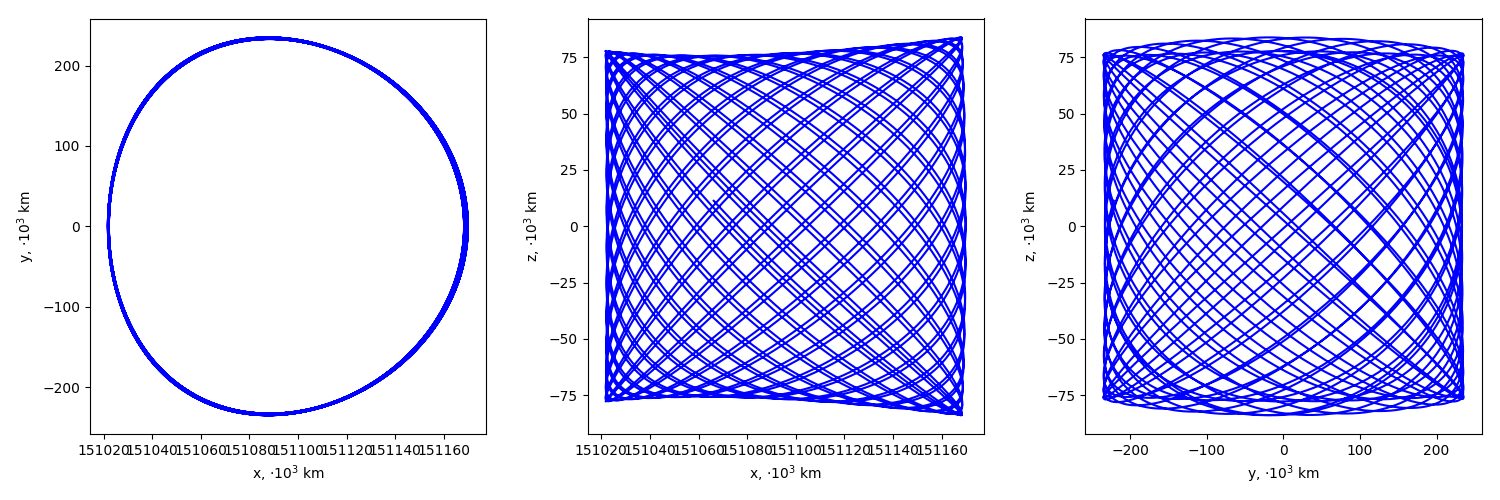

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b9c33c9e8>,
      dtype=object)

In [25]:
plotter.plot_proj(orb)